In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score
from six import StringIO  
from IPython.display import Image 
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier 

In [4]:
df = pd.read_csv("classification.csv")

In [5]:
df

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,2.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [7]:
df.columns

Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [8]:
df["Diabetes_012"] = df["Diabetes_012"].astype(int)

In [9]:
df["HighBP"] = df["HighBP"].astype(int)
df["HighChol"] = df["HighChol"].astype(int)
df["CholCheck"] = df["CholCheck"].astype(int)
df["BMI"] = df["BMI"].astype(int)
df["Smoker"] = df["Smoker"].astype(int)
df["Stroke"] = df["Stroke"].astype(int)
df["HeartDiseaseorAttack"] = df["HeartDiseaseorAttack"].astype(int)
df["PhysActivity"] = df["PhysActivity"].astype(int)
df["Fruits"] = df["Fruits"].astype(int)
df["Veggies"] = df["Veggies"].astype(int)
df["HvyAlcoholConsump"] = df["HvyAlcoholConsump"].astype(int)
df["AnyHealthcare"] = df["AnyHealthcare"].astype(int)
df["NoDocbcCost"] = df["NoDocbcCost"].astype(int)
df["GenHlth"] = df["GenHlth"].astype(int)
df["MentHlth"] = df["MentHlth"].astype(int)
df["PhysHlth"] = df["PhysHlth"].astype(int)
df["DiffWalk"] = df["DiffWalk"].astype(int)
df["Sex"] = df["Sex"].astype(int)
df["Age"] = df["Age"].astype(int)
df["Education"] = df["Education"].astype(int)
df["Income"] = df["Income"].astype(int)


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   Diabetes_012          253680 non-null  int64
 1   HighBP                253680 non-null  int64
 2   HighChol              253680 non-null  int64
 3   CholCheck             253680 non-null  int64
 4   BMI                   253680 non-null  int64
 5   Smoker                253680 non-null  int64
 6   Stroke                253680 non-null  int64
 7   HeartDiseaseorAttack  253680 non-null  int64
 8   PhysActivity          253680 non-null  int64
 9   Fruits                253680 non-null  int64
 10  Veggies               253680 non-null  int64
 11  HvyAlcoholConsump     253680 non-null  int64
 12  AnyHealthcare         253680 non-null  int64
 13  NoDocbcCost           253680 non-null  int64
 14  GenHlth               253680 non-null  int64
 15  MentHlth              253680 non-n

In [11]:
#df["Diabetes_012"].replace({1:0}, inplace = True)
#df["Diabetes_012"].drop(1, inplace = True)
df= df[df["Diabetes_012"]!=1]

In [12]:
df.loc[(df["Diabetes_012"]== 2),"Diabetes_012" ]=1

In [13]:
df.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1,1,1,40,1,0,0,0,0,...,1,0,5,18,15,1,0,9,4,3
1,0,0,0,0,25,1,0,0,1,0,...,0,1,3,0,0,0,0,7,6,1
2,0,1,1,1,28,0,0,0,0,1,...,1,1,5,30,30,1,0,9,4,8
3,0,1,0,1,27,0,0,0,1,1,...,1,0,2,0,0,0,0,11,3,6
4,0,1,1,1,24,0,0,0,1,1,...,1,0,2,3,0,0,0,11,5,4


In [14]:
#Divide dataset into features and Traget variables
X= df.loc[:, "HighBP": "Income"]
y = df["Diabetes_012"]

In [112]:
df.to_csv('Diabetes.csv')

In [16]:
def accuracy(actuals, preds):
    return np.mean(actuals == preds)

def precision(actuals, preds):
    tp = np.sum((actuals == 1) & (preds == 1))
    fp = np.sum((actuals == 0) & (preds == 1))
    return tp / (tp + fp)

def recall(actuals, preds):
    tp = np.sum((actuals == 1) & (preds == 1))
    fn = np.sum((actuals == 1) & (preds == 0))
    return tp / (tp + fn)

def F1(actuals, preds):
    p, r = precision(actuals, preds), recall(actuals, preds)
    return 2*p*r / (p + r)

0    0.858076
1    0.141924
Name: Diabetes_012, dtype: float64


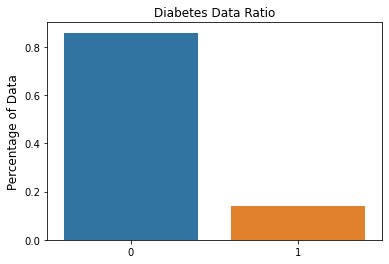

In [17]:
from sklearn.preprocessing import StandardScaler
target = df.Diabetes_012.value_counts(normalize=True) 
print(target)
sns.barplot(target.index, target.values)
plt.title('Diabetes Data Ratio')
plt.ylabel('Percentage of Data', fontsize=12);

In [18]:
import sweetviz
from sweetviz.sv_types import NumWithPercent, FeatureToProcess

In [19]:
my_report = sweetviz.analyze(df, target_feat= "Diabetes_012")
my_report.show_html("data.html")

                                             |      | [  0%]   00:00 -> (? left)

Report data.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


# Split Data into Train and Test

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.utils import resample


In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=27)
X_train.shape, y_train.shape


((186786, 21), (186786,))

# Over Sample Data to Fix Imbalance

In [22]:
import imblearn.over_sampling

# Set up for the ration argument of RandomOverSampler Initialization 
n_pos = np.sum(y_train == 1)
n_neg = np.sum(y_train == 0)

ratio = {1: n_pos *4, 0: n_neg}

In [23]:
ROS = imblearn.over_sampling.RandomOverSampler(sampling_strategy = ratio, random_state = 42)

X_train_rs, y_train_rs = ROS.fit_resample(X_train, y_train)

# Logistic Regression 


In [24]:

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_logreg =logreg.predict(X_test)


In [25]:
print ("confusion matrix: \n\n", confusion_matrix(y_test, y_pred_logreg))
print(classification_report (y_test, y_pred_logreg))

confusion matrix: 

 [[52292  1145]
 [ 7420  1406]]
              precision    recall  f1-score   support

           0       0.88      0.98      0.92     53437
           1       0.55      0.16      0.25      8826

    accuracy                           0.86     62263
   macro avg       0.71      0.57      0.59     62263
weighted avg       0.83      0.86      0.83     62263



In [26]:
print('Logistic Regression: \n Accuracy: %.4f \n Precision: %.4f \n Recall: %.4f \n F1: %.4f' %
        (accuracy(y_test, logreg.predict(X_test)), 
         precision(y_test, logreg.predict(X_test)), 
         recall(y_test, logreg.predict(X_test)),
         F1(y_test, logreg.predict(X_test))
        )
     )

Logistic Regression: 
 Accuracy: 0.8624 
 Precision: 0.5512 
 Recall: 0.1593 
 F1: 0.2472


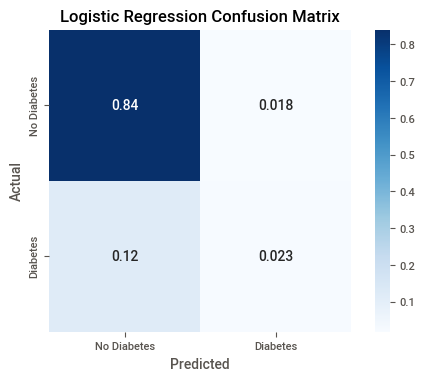

In [27]:
log_reg_confusion = confusion_matrix(y_test, y_pred_logreg, normalize ="all")
sns.heatmap(log_reg_confusion, cmap=plt.cm.Blues, annot = True, square = True,
            xticklabels = ["No Diabetes", "Diabetes"],
            yticklabels = ["No Diabetes", "Diabetes"])
plt.xlabel ("Predicted")
plt.ylabel("Actual")
plt.title ("Logistic Regression Confusion Matrix");

# Logistic Regression on resampled data 

In [28]:
logreg = LogisticRegression()
logreg.fit(X_train_rs, y_train_rs)
y_pred_logreg =logreg.predict(X_test)

In [29]:
print ("confusion matrix: \n\n", confusion_matrix(y_test, y_pred_logreg))
print(classification_report (y_test, y_pred_logreg))

confusion matrix: 

 [[43444  9993]
 [ 3110  5716]]
              precision    recall  f1-score   support

           0       0.93      0.81      0.87     53437
           1       0.36      0.65      0.47      8826

    accuracy                           0.79     62263
   macro avg       0.65      0.73      0.67     62263
weighted avg       0.85      0.79      0.81     62263



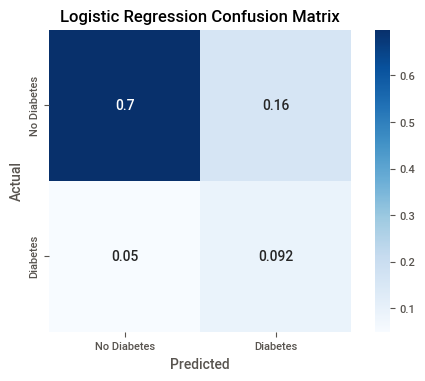

In [30]:
log_reg_confusion = confusion_matrix(y_test, y_pred_logreg, normalize ="all")
sns.heatmap(log_reg_confusion, cmap=plt.cm.Blues, annot = True, square = True,
            xticklabels = ["No Diabetes", "Diabetes"],
            yticklabels = ["No Diabetes", "Diabetes"])
plt.xlabel ("Predicted")
plt.ylabel("Actual")
plt.title ("Logistic Regression Confusion Matrix");

In [31]:
print('Logistic Regression: \n Accuracy: %.4f \n Precision: %.4f \n Recall: %.4f \n F1: %.4f' %
        (accuracy(y_test, logreg.predict(X_test)), 
         precision(y_test, logreg.predict(X_test)), 
         recall(y_test, logreg.predict(X_test)),
         F1(y_test, logreg.predict(X_test))
        )
     )

Logistic Regression: 
 Accuracy: 0.7896 
 Precision: 0.3639 
 Recall: 0.6476 
 F1: 0.4659


In [32]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(logreg, X_train_rs, y_train_rs, cv=10)
print('Cross-Validation Accuracy Scores', scores)

Cross-Validation Accuracy Scores [0.74965271 0.74781303 0.74135536 0.74439647 0.7455979  0.74571053
 0.74404896 0.74341068 0.74048209 0.74307276]


In [33]:
scores = pd.Series(scores)
scores.mean()

0.7445540492378179

Feature: 0, Score: 0.16320
Feature: 1, Score: -0.64301
Feature: 2, Score: 0.48497
Feature: 3, Score: -0.46190
Feature: 4, Score: 0.18432
Feature: 5, Score: -0.11978
Feature: 6, Score: -0.40602
Feature: 7, Score: 0.03772
Feature: 8, Score: -0.51785
Feature: 9, Score: 0.26540


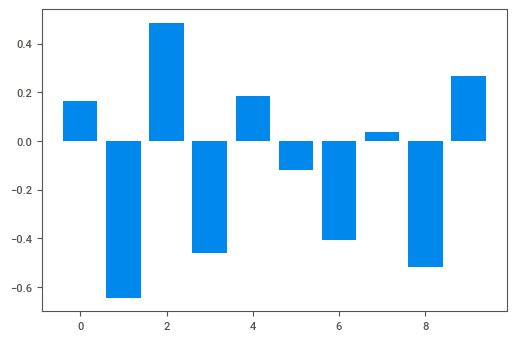

In [37]:

# logistic regression for feature importance
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot
# define dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)
# define the model
model = LogisticRegression()
# fit the model
model.fit(X, y)
# get importance
importance = model.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

# KNN Algorithm 

In [38]:
#KNN 
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(X_train_rs, y_train_rs)

KNeighborsClassifier(n_neighbors=10)

In [40]:
print('10 nearest neighbors validation metrics: \n Accuracy: %.4f \n Precision: %.4f \n Recall: %.4f \n F1: %.4f' %
        (accuracy(y_test, knn.predict(X_test)), 
         precision(y_test, knn.predict(X_test)), 
         recall(y_test, knn.predict(X_test)),
         F1(y_test, knn.predict(X_test))
        )
     )

10 nearest neighbors validation metrics: 
 Accuracy: 0.7673 
 Precision: 0.3128 
 Recall: 0.5360 
 F1: 0.3951


In [41]:
scores = cross_val_score(knn, X_train_rs, y_train_rs, cv=10)
print('Cross-Validation Accuracy Scores', scores)

Cross-Validation Accuracy Scores [0.76538389 0.76662286 0.77071522 0.78464427 0.78554534 0.78302985
 0.78275888 0.78452354 0.77810318 0.78414808]


In [42]:
scores = pd.Series(scores)
scores.min(), scores.mean(), scores.max()

(0.7653838933733809, 0.7785475109205134, 0.7855453350854139)

_____________________________________________________________________________________________________________________

# RANDOM Forest Algorithm

In [95]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
#create a Gaussian Classifier
random_forest_clf=rfc = RandomForestClassifier(n_estimators=100, n_jobs = -1,class_weight="balanced",random_state =50 , min_samples_leaf = 10)
rfc.fit(X_train,y_train)
y_pred_rfc = random_forest_clf.predict(X_test)

In [96]:
print("confusion matrix: \n\n", 
      confusion_matrix(y_test, y_pred_rfc))

print(classification_report(y_test, y_pred_rfc))

confusion matrix: 

 [[41581 11856]
 [ 2476  6350]]
              precision    recall  f1-score   support

           0       0.94      0.78      0.85     53437
           1       0.35      0.72      0.47      8826

    accuracy                           0.77     62263
   macro avg       0.65      0.75      0.66     62263
weighted avg       0.86      0.77      0.80     62263



In [97]:
scores = cross_val_score(random_forest_clf, X_train_rs, y_train_rs, cv=10)
print('Cross-Validation Accuracy Scores', scores)


Cross-Validation Accuracy Scores [0.79864839 0.79759715 0.79643326 0.80649521 0.80551905 0.80390464
 0.80513629 0.80171961 0.8060374  0.80412255]


In [98]:
scores = pd.Series(scores)
scores.min(), scores.mean(), scores.max()

(0.7964332645015957, 0.8025613554189768, 0.8064952130655153)

In [99]:
print('Random Forest validation metrics: \n Accuracy: %.4f \n Precision: %.4f \n Recall: %.4f \n F1: %.4f' %
        (accuracy(y_test, random_forest_clf.predict(X_test)), 
         precision(y_test, random_forest_clf.predict(X_test)), 
         recall(y_test, random_forest_clf.predict(X_test)),
         F1(y_test, random_forest_clf.predict(X_test))
        )
     )

Random Forest validation metrics: 
 Accuracy: 0.7698 
 Precision: 0.3488 
 Recall: 0.7195 
 F1: 0.4698


Feature: 0, Score: 0.00697
Feature: 1, Score: 0.00702
Feature: 2, Score: 0.00572
Feature: 3, Score: 0.10116
Feature: 4, Score: 0.19873
Feature: 5, Score: 0.00565
Feature: 6, Score: 0.00636
Feature: 7, Score: 0.37009
Feature: 8, Score: 0.27829
Feature: 9, Score: 0.00652
Feature: 10, Score: 0.00709
Feature: 11, Score: 0.00639


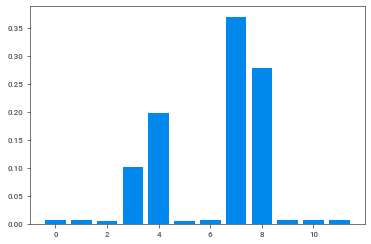

In [100]:
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot
# define dataset
X, y = make_regression(n_samples=1000, n_features=12, n_informative=5, random_state=1)
# define the model
model = RandomForestRegressor()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

_____________________________________________________________________________________________________________________

# Decision Tree Algorithmn

In [101]:
feature_cols = ['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income']

In [102]:
decision_tree_clf = DecisionTreeClassifier(max_depth=3)#can either set it here or in fit 
decision_tree_clf = decision_tree_clf.fit(X_train_rs, y_train_rs)
y_pred = decision_tree_clf.predict(X_test)

In [103]:
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))
#precision is how accurate tyour model is 
print("Precision: ", metrics.precision_score(y_test, y_pred, pos_label= 0)) 
print("Recall: ", metrics.recall_score(y_test, y_pred, pos_label= 0))

Accuracy:  0.7698633217159468
Precision:  0.9270924340380919
Recall:  0.7943185433313996


In [104]:
print('Decision Tree validation metrics: \n Accuracy: %.4f \n Precision: %.4f \n Recall: %.4f \n F1: %.4f' %
        (accuracy(y_test, decision_tree_clf.predict(X_test)), 
         precision(y_test, decision_tree_clf.predict(X_test)), 
         recall(y_test, decision_tree_clf.predict(X_test)),
         F1(y_test, decision_tree_clf.predict(X_test))
        )
     )

Decision Tree validation metrics: 
 Accuracy: 0.7699 
 Precision: 0.3330 
 Recall: 0.6218 
 F1: 0.4337


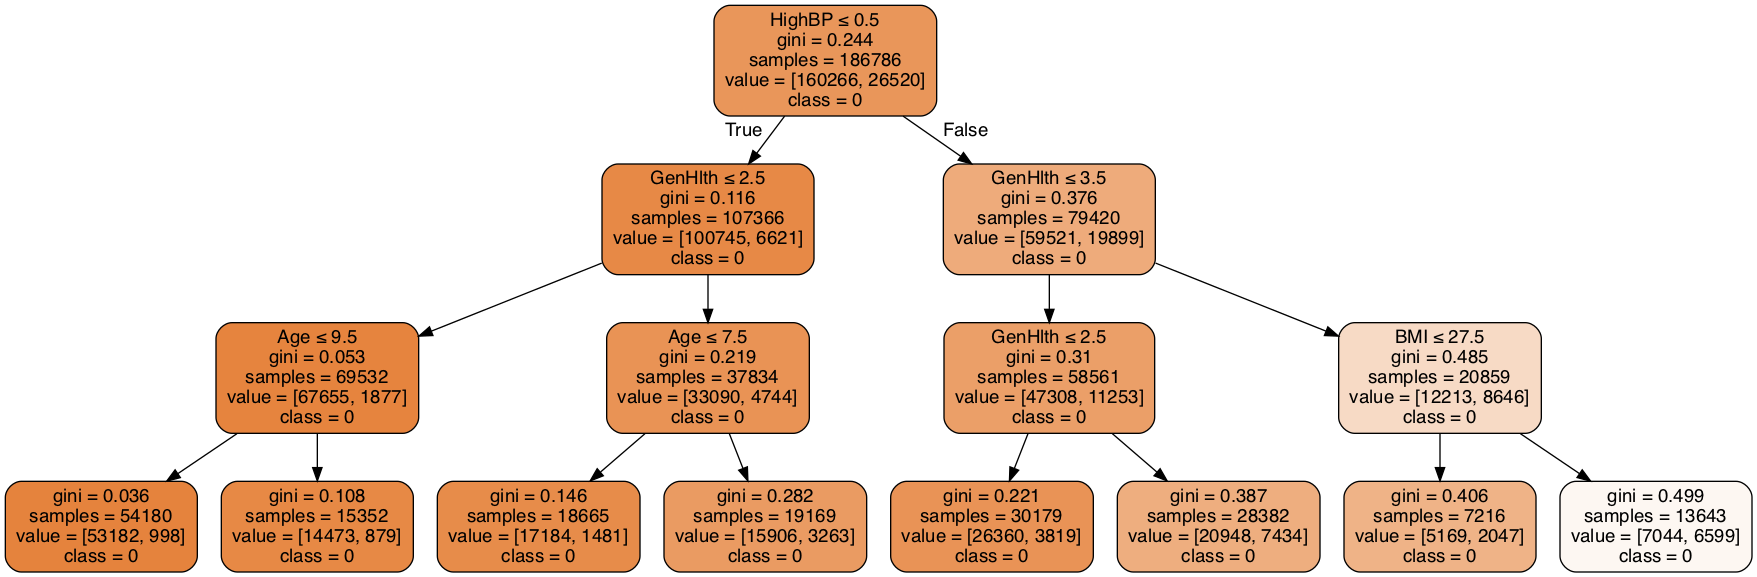

In [82]:
dot_data = StringIO()
export_graphviz(decision_tree_clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

In [105]:
scores = cross_val_score(decision_tree_clf, X_train_rs, y_train_rs, cv=10)
print('Cross-Validation Accuracy Scores', scores)


Cross-Validation Accuracy Scores [0.71912897 0.72130655 0.71319692 0.71995495 0.71860334 0.7185658
 0.71269806 0.71311106 0.71754149 0.72069535]


In [106]:
scores = pd.Series(scores)
scores.min(), scores.mean(), scores.max()

(0.7126980551175189, 0.7174802479667967, 0.7213065515299418)

In [ ]:
#hyper parameter tuning on best one. Logistic regression regualization parameters alpha or beta. cross validation for small amount of data. Validation for large data set.


In [ ]:
#hard predictor, yes no, soft predictor, model explainability. what are the ones that they can change. Save your model.and run a new data through it . Web app. 

# Ensembling Algorithmn

In [77]:
#import and instantiate base models
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
dt= DecisionTreeClassifier()
lr= LogisticRegression(C=1000)

In [78]:

model_list = [("knn", knn),
             ("tree", dt),
             ("log_reg", lr)]

In [113]:
#train ans score basemodels
#fit and check the accuracy of each base model

for model in model_list:
    curr_name, curr_model = model
    curr_model.fit(X_train_rs, y_train_rs)
    curr_score = curr_model.score(X_test, y_test)
    
    print(f'{curr_name} score: {curr_score}')

knn score: 0.7408733919020928
tree score: 0.7963156288646548
log_reg score: 0.7865024171658931


# Voting Classifier

In [80]:
#import and instantiate voting classifier
from sklearn.ensemble import VotingClassifier

vc = VotingClassifier (estimators=model_list,
                      voting = "hard", #max and mjority voting #soft for average voting
                      weights = None)

In [114]:

#fit and score voting classifier
vc.fit(X_train_rs, y_train_rs)
vc.score(X_test, y_test)

0.7975041356825081

In [119]:
print('Ensembling Voting Classifier validation metrics: \n Accuracy: %.4f \n Precision: %.4f \n Recall: %.4f \n F1: %.4f' %
        (accuracy(y_test, vc.predict(X_test)), 
         precision(y_test, vc.predict(X_test)), 
         recall(y_test, vc.predict(X_test)),
         F1(y_test, vc.predict(X_test))
        )
     )

Ensembling Voting Classifier validation metrics: 
 Accuracy: 0.7975 
 Precision: 0.3560 
 Recall: 0.5296 
 F1: 0.4258


# Cross Validation on Voting Classifer 

In [116]:
scores = cross_val_score(vc, X_train_rs, y_train_rs, cv=10)
print('Cross-Validation Accuracy Scores', scores)

Cross-Validation Accuracy Scores [0.86258682 0.86311245 0.8634128  0.88124648 0.88102121 0.8786559
 0.88071638 0.88045356 0.88086656 0.87793797]


In [117]:
scores = pd.Series(scores)
scores.min(), scores.mean(), scores.max()

(0.862586821850948, 0.875001013607917, 0.8812464801952319)

# Stacking Classifier 

In [73]:
#stacking classifier 
from sklearn.ensemble import StackingClassifier

sc= StackingClassifier(estimators=model_list,
                      final_estimator= LogisticRegression())

In [87]:
sc.fit(X_train, y_train)
sc.score(X_test, y_test)

0.8623098790614009


# Cross Validation on Stacking Classifer 

In [90]:
scores = cross_val_score(sc, X_train_rs, y_train_rs, cv=10)
print('Cross-Validation Accuracy Scores', scores)

Cross-Validation Accuracy Scores [0.91383518 0.91278393 0.91650084 0.9275765  0.93110569 0.92862775
 0.92956372 0.93080273 0.92877525 0.93027709]


In [93]:
scores = pd.Series(scores)
scores.min(), scores.mean(), scores.max()

(0.9127839309179651, 0.9249848673504337, 0.9311056880045053)

In [118]:
print('Ensembling Stacking validation metrics: \n Accuracy: %.4f \n Precision: %.4f \n Recall: %.4f \n F1: %.4f' %
        (accuracy(y_test, sc.predict(X_test)), 
         precision(y_test, sc.predict(X_test)), 
         recall(y_test, sc.predict(X_test)),
         F1(y_test, sc.predict(X_test))
        )
     )

Ensembling Stacking validation metrics: 
 Accuracy: 0.8623 
 Precision: 0.5388 
 Recall: 0.1988 
 F1: 0.2905
